# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista.

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187646 entries, 0 to 187645
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CNPJ emit.           187646 non-null  object        
 1   Emitente             187646 non-null  object        
 2   No.                  187646 non-null  int64         
 3   Data Emissão         187646 non-null  datetime64[ns]
 4   Valor NF             187646 non-null  float64       
 5   Data Registro        187646 non-null  datetime64[ns]
 6   Créditos             187646 non-null  float64       
 7   Situação do Crédito  187646 non-null  category      
 8   Ano                  187646 non-null  int64         
 9   Semestre             187646 non-null  int64         
 10  Retorno              186666 non-null  float64       
 11  flag_credito         187646 non-null  int64         
 12  categoria            187646 non-null  object        
dtypes: category(1)

## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [6]:
df_jan2020 = df[df["Data Emissão"].isin(pd.date_range("2020-01-01", "2020-01-31"))]
df_jan2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3476 entries, 64598 to 142901
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CNPJ emit.           3476 non-null   object        
 1   Emitente             3476 non-null   object        
 2   No.                  3476 non-null   int64         
 3   Data Emissão         3476 non-null   datetime64[ns]
 4   Valor NF             3476 non-null   float64       
 5   Data Registro        3476 non-null   datetime64[ns]
 6   Créditos             3476 non-null   float64       
 7   Situação do Crédito  3476 non-null   category      
 8   Ano                  3476 non-null   int64         
 9   Semestre             3476 non-null   int64         
 10  Retorno              3471 non-null   float64       
 11  flag_credito         3476 non-null   int64         
 12  categoria            3476 non-null   object        
dtypes: category(1), datetime64[

In [7]:
df_jan2020.groupby('Retorno')['categoria'].describe()

,count,unique,top,freq
Retorno,,,,
0.000000,1749,9,Mercado,538
0.000079,1,1,não definido,1
0.000140,1,1,Construção,1
0.000158,1,1,Farmácia,1
0.000158,1,1,Auto posto,1
...,...,...,...,...
10.539674,1,1,Alimentos,1
10.895817,1,1,não definido,1
14.989444,1,1,Mercado,1


In [8]:
df_scatterplot = df[['Retorno', 'flag_credito', 'categoria']]

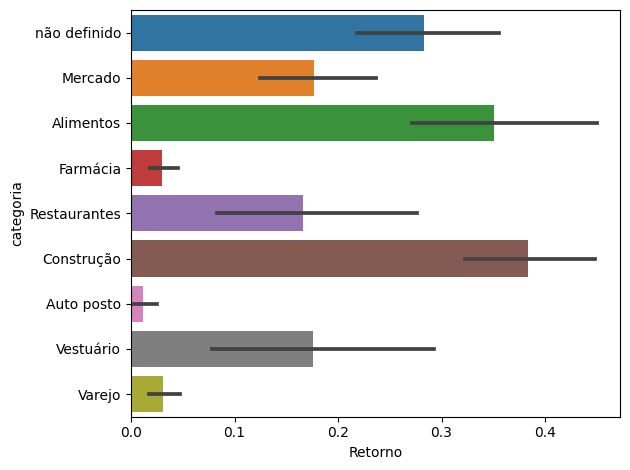

In [9]:
#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras
sns.barplot(x=df_jan2020['Retorno'], y=df_jan2020['categoria'], ax=ax, data=df_jan2020)
#otimizar espaço da figure
fig.tight_layout();

In [10]:
tab = pd.crosstab(df_jan2020.categoria, df_jan2020.Retorno, margins=True, margins_name='total')
tab

Retorno,0.0,7.874015748031496e-05,0.00013995801259622114,0.00015760441292356184,0.00015786981002999524,0.0002833463200396685,0.000333000333000333,0.0005176876617773942,0.0005198856251624643,0.0005797101449275362,...,8.696062992125984,9.203333333333335,9.29381793478261,9.801666666666668,10.53967391304348,10.895816890292028,14.989444053483462,14.989519112207152,15.895221646516983,total
categoria,,,,,,,,,,,,,,,,,,,,,
Alimentos,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,278
Auto posto,30,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,40
Construção,305,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,650
Farmácia,292,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,355
Mercado,538,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,1016
Restaurantes,35,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,246
Varejo,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,124
Vestuário,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,95
não definido,339,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,667


In [11]:
tab['dif'] = tab['total'] - tab[0.0]
tab

Retorno,0.0,7.874015748031496e-05,0.00013995801259622114,0.00015760441292356184,0.00015786981002999524,0.0002833463200396685,0.000333000333000333,0.0005176876617773942,0.0005198856251624643,0.0005797101449275362,...,9.203333333333335,9.29381793478261,9.801666666666668,10.53967391304348,10.895816890292028,14.989444053483462,14.989519112207152,15.895221646516983,total,dif
categoria,,,,,,,,,,,,,,,,,,,,,
Alimentos,56,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,278,222
Auto posto,30,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,40,10
Construção,305,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,650,345
Farmácia,292,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,355,63
Mercado,538,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1016,478
Restaurantes,35,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,246,211
Varejo,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,124,32
Vestuário,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,95,33
não definido,339,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,667,328


In [12]:
tab['proporção %'] = (tab['dif'] / tab ['total'])*100
tab

Retorno,0.0,7.874015748031496e-05,0.00013995801259622114,0.00015760441292356184,0.00015786981002999524,0.0002833463200396685,0.000333000333000333,0.0005176876617773942,0.0005198856251624643,0.0005797101449275362,...,9.29381793478261,9.801666666666668,10.53967391304348,10.895816890292028,14.989444053483462,14.989519112207152,15.895221646516983,total,dif,proporção %
categoria,,,,,,,,,,,,,,,,,,,,,
Alimentos,56,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,278,222,79.856115
Auto posto,30,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,40,10,25.000000
Construção,305,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,650,345,53.076923
Farmácia,292,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,355,63,17.746479
Mercado,538,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1016,478,47.047244
Restaurantes,35,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,246,211,85.772358
Varejo,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,124,32,25.806452
Vestuário,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,95,33,34.736842
não definido,339,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,667,328,49.175412


In [13]:
tab_2 = tab
tab_2 = tab_2.reset_index()

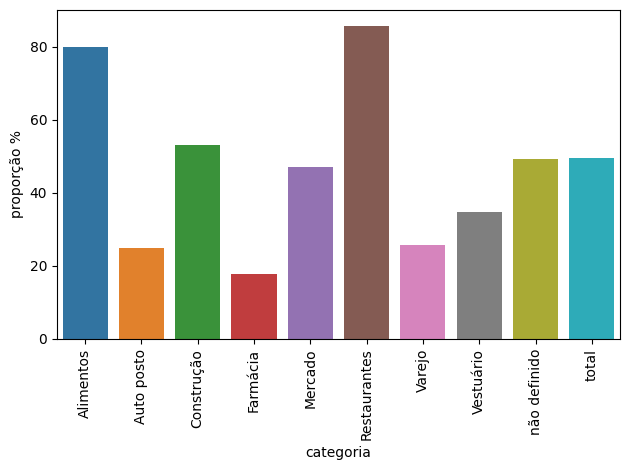

In [14]:
#criando uma figure, axes
fig, ax = plt.subplots()
#criando o gráfico de barras
sns.barplot(x=tab_2['categoria'], y=tab_2['proporção %'], ax=ax, data=tab_2)
plt.xticks(rotation=90)
#otimizar espaço da figure
fig.tight_layout();

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [15]:
tab['bad_rate'] = (tab['dif'] / tab ['total'])
tab

Retorno,0.0,7.874015748031496e-05,0.00013995801259622114,0.00015760441292356184,0.00015786981002999524,0.0002833463200396685,0.000333000333000333,0.0005176876617773942,0.0005198856251624643,0.0005797101449275362,...,9.801666666666668,10.53967391304348,10.895816890292028,14.989444053483462,14.989519112207152,15.895221646516983,total,dif,proporção %,bad_rate
categoria,,,,,,,,,,,,,,,,,,,,,
Alimentos,56,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,278,222,79.856115,0.798561
Auto posto,30,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,40,10,25.000000,0.250000
Construção,305,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,650,345,53.076923,0.530769
Farmácia,292,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,355,63,17.746479,0.177465
Mercado,538,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1016,478,47.047244,0.470472
Restaurantes,35,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,246,211,85.772358,0.857724
Varejo,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,124,32,25.806452,0.258065
Vestuário,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,95,33,34.736842,0.347368
não definido,339,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,667,328,49.175412,0.491754


In [16]:
tab['odds'] = (tab['dif']/tab[0.0])
tab['odds_ratio'] = tab['odds']/tab.loc['total', 'odds']
tab['woe'] = np.log(tab.odds_ratio)
tab

Retorno,0.0,7.874015748031496e-05,0.00013995801259622114,0.00015760441292356184,0.00015786981002999524,0.0002833463200396685,0.000333000333000333,0.0005176876617773942,0.0005198856251624643,0.0005797101449275362,...,14.989444053483462,14.989519112207152,15.895221646516983,total,dif,proporção %,bad_rate,odds,odds_ratio,woe
categoria,,,,,,,,,,,,,,,,,,,,,
Alimentos,56,0,0,0,0,0,0,0,0,0,...,0,0,0,278,222,79.856115,0.798561,3.964286,4.026444,1.392883
Auto posto,30,0,0,0,1,0,1,0,0,0,...,0,0,0,40,10,25.000000,0.250000,0.333333,0.338560,-1.083054
Construção,305,0,1,0,0,0,0,1,1,0,...,0,0,0,650,345,53.076923,0.530769,1.131148,1.148883,0.138790
Farmácia,292,0,0,1,0,1,0,0,0,0,...,0,0,0,355,63,17.746479,0.177465,0.215753,0.219136,-1.518061
Mercado,538,0,0,0,0,0,0,0,0,0,...,1,1,1,1016,478,47.047244,0.470472,0.888476,0.902407,-0.102690
Restaurantes,35,0,0,0,0,0,0,0,0,1,...,0,0,0,246,211,85.772358,0.857724,6.028571,6.123096,1.812068
Varejo,92,0,0,0,0,0,0,0,0,0,...,0,0,0,124,32,25.806452,0.258065,0.347826,0.353280,-1.040495
Vestuário,62,0,0,0,0,0,0,0,0,0,...,0,0,0,95,33,34.736842,0.347368,0.532258,0.540604,-0.615069
não definido,339,1,0,0,0,0,0,0,0,0,...,0,0,0,667,328,49.175412,0.491754,0.967552,0.982722,-0.017429


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [17]:
tab_IV = pd.crosstab(df_jan2020.categoria, df_jan2020.Retorno, margins=True, margins_name='total')
tab_IV[0] = tab[0.0]
tab_IV[1] = tab['total'] - tab[0]
tab_IV

Retorno,0.0,7.874015748031496e-05,0.00013995801259622114,0.00015760441292356184,0.00015786981002999524,0.0002833463200396685,0.000333000333000333,0.0005176876617773942,0.0005198856251624643,0.0005797101449275362,...,9.203333333333335,9.29381793478261,9.801666666666668,10.53967391304348,10.895816890292028,14.989444053483462,14.989519112207152,15.895221646516983,total,1
categoria,,,,,,,,,,,,,,,,,,,,,
Alimentos,56,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,278,222
Auto posto,30,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,40,10
Construção,305,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,650,345
Farmácia,292,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,355,63
Mercado,538,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1016,478
Restaurantes,35,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,246,211
Varejo,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,124,32
Vestuário,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,95,33
não definido,339,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,667,328


In [18]:
tab_IV['pct_evento'] = tab_IV[0.0]/tab_IV.loc['total', 0.0]
tab_IV['pct_nao_evento'] = tab_IV[1]/tab_IV.loc['total', 1]
tab_IV['woe'] = np.log(tab_IV.pct_evento/tab_IV.pct_nao_evento)
tab_IV

Retorno,0.0,7.874015748031496e-05,0.00013995801259622114,0.00015760441292356184,0.00015786981002999524,0.0002833463200396685,0.000333000333000333,0.0005176876617773942,0.0005198856251624643,0.0005797101449275362,...,10.53967391304348,10.895816890292028,14.989444053483462,14.989519112207152,15.895221646516983,total,1,pct_evento,pct_nao_evento,woe
categoria,,,,,,,,,,,,,,,,,,,,,
Alimentos,56,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,278,222,0.032018,0.128920,-1.392883
Auto posto,30,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,40,10,0.017153,0.005807,1.083054
Construção,305,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,650,345,0.174385,0.200348,-0.138790
Farmácia,292,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,355,63,0.166953,0.036585,1.518061
Mercado,538,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1016,478,0.307604,0.277584,0.102690
Restaurantes,35,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,246,211,0.020011,0.122532,-1.812068
Varejo,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,124,32,0.052601,0.018583,1.040495
Vestuário,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,95,33,0.035449,0.019164,0.615069
não definido,339,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,667,328,0.193825,0.190476,0.017429


In [19]:
tab_IV['iv_parcial'] = (tab_IV.pct_evento - tab_IV.pct_nao_evento)*tab_IV.woe
print(tab_IV.iv_parcial.sum())
tab_IV

0.5830968321431468


Retorno,0.0,7.874015748031496e-05,0.00013995801259622114,0.00015760441292356184,0.00015786981002999524,0.0002833463200396685,0.000333000333000333,0.0005176876617773942,0.0005198856251624643,0.0005797101449275362,...,10.895816890292028,14.989444053483462,14.989519112207152,15.895221646516983,total,1,pct_evento,pct_nao_evento,woe,iv_parcial
categoria,,,,,,,,,,,,,,,,,,,,,
Alimentos,56,0,0,0,0,0,0,0,0,0,...,0,0,0,0,278,222,0.032018,0.128920,-1.392883,0.134973
Auto posto,30,0,0,0,1,0,1,0,0,0,...,0,0,0,0,40,10,0.017153,0.005807,1.083054,0.012288
Construção,305,0,1,0,0,0,0,1,1,0,...,0,0,0,0,650,345,0.174385,0.200348,-0.138790,0.003603
Farmácia,292,0,0,1,0,1,0,0,0,0,...,0,0,0,0,355,63,0.166953,0.036585,1.518061,0.197905
Mercado,538,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1016,478,0.307604,0.277584,0.102690,0.003083
Restaurantes,35,0,0,0,0,0,0,0,0,1,...,0,0,0,0,246,211,0.020011,0.122532,-1.812068,0.185774
Varejo,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,124,32,0.052601,0.018583,1.040495,0.035396
Vestuário,62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,95,33,0.035449,0.019164,0.615069,0.010016
não definido,339,1,0,0,0,0,0,0,0,0,...,1,0,0,0,667,328,0.193825,0.190476,0.017429,0.000058


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


Naeem Siddiqi recomenda as seguintes regras de bolso para interpretar o IV:

|Faixa|Poder preditivo|
|:-|:-|
|0 a 0,02| Inútil |
|0,02 a 0,1| Fraco |
|0,1 a 0,3| Médio |
|0,3 a 0,5| Forte |
|0,5 ou mais| Suspeito de tão alto |



In [20]:
tab_IV['iv_parcial'].head(10)

categoria
Alimentos       0.134973
Auto posto      0.012288
Construção      0.003603
Farmácia        0.197905
Mercado         0.003083
Restaurantes    0.185774
Varejo          0.035396
Vestuário       0.010016
não definido    0.000058
total           0.000000
Name: iv_parcial, dtype: float64

De acordo com o Naeem Siddiqi, conclui-se que as categorias 'Alimentos', 'Farmácia' e 'Restaurantes' possuem um poder preditivo médio com as outras categorias possuindo um poder fraco ou inútil como ferramenta preditiva.

In [22]:
((tab_IV.pct_evento - tab_IV.pct_nao_evento)*tab_IV.woe).sum()

0.5830968321431468